# Agriculture % of GDP - Cholesterol Women

In [1]:
import pandas as pd # pandas will be referred to as pd below
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### İlk aşamada Agriculture veri seti üzerinde çalıştım.

In [2]:
data_Agriculture= pd.read_csv('Agriculture.csv')
data_Agriculture.head(7)

,Area,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.158479,46.013843,41.594103,39.480416,32.589058,34.494833,28.134488,31.177550,29.915323,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.311622,23.996207,23.499999,22.800000,22.000000,21.117256,20.304655,20.401935,20.160029,20.04532
4,Algeria,NaN,NaN,NaN,NaN,12.876213,9.137256,10.330666,10.853374,9.030165,...,10.003598,10.491237,10.188493,8.221657,7.988789,8.025346,6.920100,6.915571,6.915571,NaN
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Alanları yani sütun başlıklarını sutun adlı bir listeye ekledim. Sadece yılları listede tutmak istediğim için “Area” alanını listeden çıkardım.

In [3]:
sutun=list(data_Agriculture.columns)
sutun.remove('Area')

### İki ayrı veri setini birleştirmede sorun yaşamamak için veri seti üzerinde aşağıdaki değişikliği yaptım. Veriler (n x m) matrisinden (p x 3) hale gelmiştir

In [4]:
yeni_data_Agriculture=pd.melt(data_Agriculture, id_vars=['Area'], value_vars=sutun)
yeni_data_Agriculture.head(7)

,Area,variable,value
0,Abkhazia,1961,NaN
1,Afghanistan,1961,NaN
2,Akrotiri and Dhekelia,1961,NaN
3,Albania,1961,NaN
4,Algeria,1961,NaN
5,American Samoa,1961,NaN
6,Andorra,1961,NaN


### Sütun başlıklarını düzenlendim

In [5]:
yeni_data_Agriculture.rename(columns={'variable': 'Year', 'value': 'Agriculture'}, inplace=True)
yeni_data_Agriculture.columns

Index(['Area', 'Year', 'Agriculture'], dtype='object')

In [6]:
yeni_data_Agriculture.head(7)

,Area,Year,Agriculture
0,Abkhazia,1961,NaN
1,Afghanistan,1961,NaN
2,Akrotiri and Dhekelia,1961,NaN
3,Albania,1961,NaN
4,Algeria,1961,NaN
5,American Samoa,1961,NaN
6,Andorra,1961,NaN


### Agriculture veri seti üzerinde gerçekleştirdiğim tüm işlemleri Cholesterol Women veri seti üzerinde de gerçekleştiriyorum.

In [7]:
data_Cholesterol= pd.read_csv('Female_Cholesterol.csv')
data_Cholesterol.head(7)

,Area,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,4.644476,4.637118,4.630770,4.625318,4.619873,4.613289,4.607698,4.598080,4.583443,...,4.356148,4.333604,4.309802,4.295170,4.283724,4.271746,4.262364,4.253473,4.246427,4.239035
1,Albania,5.039529,5.036610,5.033352,5.028138,5.022292,5.018456,5.012306,5.008334,5.002822,...,4.916494,4.917402,4.919429,4.918646,4.915379,4.909980,4.902183,4.895111,4.888237,4.881235
2,Algeria,4.976215,4.975257,4.974508,4.976556,4.976963,4.977419,4.974378,4.971097,4.963965,...,4.873433,4.866559,4.857580,4.848951,4.841351,4.836602,4.831645,4.826501,4.821301,4.815735
3,Andorra,6.132187,6.101291,6.069412,6.038793,6.008447,5.977998,5.948506,5.918512,5.890226,...,5.592350,5.568902,5.548213,5.529060,5.513778,5.499101,5.484156,5.474519,5.465222,5.456065
4,Angola,4.789354,4.769557,4.751330,4.733550,4.719231,4.707431,4.693793,4.683528,4.674458,...,4.511637,4.505080,4.499903,4.499115,4.498331,4.498226,4.501854,4.508352,4.517577,4.528061
5,Antigua and Barbuda,5.013913,5.006714,5.000293,4.997209,4.996626,4.998084,5.001350,5.003486,5.008585,...,4.958836,4.950877,4.942736,4.934998,4.928563,4.923055,4.919910,4.919503,4.922908,4.924793
6,Argentina,5.410129,5.401470,5.385623,5.370482,5.357241,5.341568,5.326600,5.313423,5.296732,...,5.194213,5.183896,5.168998,5.143871,5.121858,5.101102,5.087423,5.078289,5.072242,5.065472


In [8]:
sutunCholesterol=list(data_Cholesterol.columns)
sutunCholesterol.remove('Area')

In [9]:
yeni_data_Cholesterol=pd.melt(data_Cholesterol, id_vars=['Area'], value_vars=sutunCholesterol)
yeni_data_Cholesterol.head(7)

,Area,variable,value
0,Afghanistan,1980,4.644476
1,Albania,1980,5.039529
2,Algeria,1980,4.976215
3,Andorra,1980,6.132187
4,Angola,1980,4.789354
5,Antigua and Barbuda,1980,5.013913
6,Argentina,1980,5.410129


In [10]:
yeni_data_Cholesterol.rename(columns={'variable': 'Year', 'value': 'Cholesterol'}, inplace=True)
yeni_data_Cholesterol.columns

Index(['Area', 'Year', 'Cholesterol'], dtype='object')

In [11]:
yeni_data_Cholesterol.head(7)

,Area,Year,Cholesterol
0,Afghanistan,1980,4.644476
1,Albania,1980,5.039529
2,Algeria,1980,4.976215
3,Andorra,1980,6.132187
4,Angola,1980,4.789354
5,Antigua and Barbuda,1980,5.013913
6,Argentina,1980,5.410129


### Agriculture(% of GDP) ve Cholesterol(in blood women) verilerinin birleştirilmesi:

In [12]:
data_Cholesterol_Agriculture = pd.merge(left= yeni_data_Cholesterol, right= yeni_data_Agriculture)
data_Cholesterol_Agriculture.head(7)

,Area,Year,Cholesterol,Agriculture
0,Afghanistan,1980,4.644476,NaN
1,Albania,1980,5.039529,33.600206
2,Algeria,1980,4.976215,8.509234
3,Andorra,1980,6.132187,NaN
4,Angola,1980,4.789354,NaN
5,Antigua and Barbuda,1980,5.013913,7.116746
6,Argentina,1980,5.410129,6.353505


### Veri setlerimizdeki kayıt sayılarına bakacak olursak:

In [13]:
print('Agriculture veri setindeki kayıt Sayısı: '+ str(len(yeni_data_Agriculture)))
print('Cholesterol veri setindeki kayıt Sayısı: '+ str(len(yeni_data_Cholesterol)))
print('Veri setleri birleştirildikten sonraki Kayıt sayısı: '+ str(len(data_Cholesterol_Agriculture)))

Agriculture veri setindeki kayıt Sayısı: 13770
Cholesterol veri setindeki kayıt Sayısı: 5771
Veri setleri birleştirildikten sonraki Kayıt sayısı: 5423


### Veri setindeki herhangi bir alanında boş değere sahip satırların temizlenmesi:

In [14]:
data_Cholesterol_Agriculture_nomissing=data_Cholesterol_Agriculture.dropna(how='any')
data_Cholesterol_Agriculture_nomissing.head(7)

,Area,Year,Cholesterol,Agriculture
1,Albania,1980,5.039529,33.600206
2,Algeria,1980,4.976215,8.509234
5,Antigua and Barbuda,1980,5.013913,7.116746
6,Argentina,1980,5.410129,6.353505
8,Australia,1980,5.776455,7.877187
9,Austria,1980,5.844535,5.299017
12,Bahrain,1980,5.318111,0.984371


In [15]:
print('Veri setleri birleştirildikten sonraki Kayıt sayısı: '+ str(len(data_Cholesterol_Agriculture)))
print('Boş veriler temizlendikten sonraki Kayıt sayısı: '+ str(len(data_Cholesterol_Agriculture_nomissing)))

Veri setleri birleştirildikten sonraki Kayıt sayısı: 5423
Boş veriler temizlendikten sonraki Kayıt sayısı: 4273


### Veri setindeki indexlerin yeniden düzenlenmesi:

In [16]:
data_Cholesterol_Agriculture_nomissing.index= range(len(data_Cholesterol_Agriculture_nomissing))
data_Cholesterol_Agriculture_nomissing.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4263, 4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4272],
           dtype='int64', length=4273)

In [17]:
data_Cholesterol_Agriculture_nomissing.head(7)

,Area,Year,Cholesterol,Agriculture
0,Albania,1980,5.039529,33.600206
1,Algeria,1980,4.976215,8.509234
2,Antigua and Barbuda,1980,5.013913,7.116746
3,Argentina,1980,5.410129,6.353505
4,Australia,1980,5.776455,7.877187
5,Austria,1980,5.844535,5.299017
6,Bahrain,1980,5.318111,0.984371


### Sonraki uygulamalarda kolaylık sağlanması için dataframe ismi data olarak düzenlendi.

In [18]:
data=data_Cholesterol_Agriculture_nomissing
data.head(10)

,Area,Year,Cholesterol,Agriculture
0,Albania,1980,5.039529,33.600206
1,Algeria,1980,4.976215,8.509234
2,Antigua and Barbuda,1980,5.013913,7.116746
3,Argentina,1980,5.410129,6.353505
4,Australia,1980,5.776455,7.877187
5,Austria,1980,5.844535,5.299017
6,Bahrain,1980,5.318111,0.984371
7,Bangladesh,1980,4.551037,31.554318
8,Barbados,1980,5.285186,9.909499
9,Belgium,1980,6.044536,2.323903


### Veri türlerinin düzenlenmesi:

In [19]:
data['Year']= pd.to_numeric(data['Year'])
data['Cholesterol']= pd.to_numeric(data['Cholesterol'])
data['Agriculture']= pd.to_numeric(data['Agriculture'])

In [20]:
data.dtypes

Area            object
Year             int64
Cholesterol    float64
Agriculture    float64
dtype: object

### Kadınlardaki kolesterol değerinin 1997 yılından sonraki yıllara göre ortalama en yüksek 5 bölgesi

In [21]:
data_98 = data [data['Year']>1997].groupby(by='Area').mean()
new_data_98=data_98.drop(['Year','Agriculture'],axis=1)
top5_data_98=new_data_98.sort_values(by='Cholesterol',ascending =False)
top5_data_98.head(5)

,Cholesterol
Area,
Iceland,5.649707
Germany,5.553366
Luxembourg,5.543594
Denmark,5.473151
United Kingdom,5.444155


### Kadınlardaki kolesterol değerinin 1997 yılından sonraki yıllara göre ortalama en düşük 5 bölgesi

In [22]:
top5_last_data_98=new_data_98.sort_values(by='Cholesterol',ascending =True)
top5_last_data_98.head(5)

,Cholesterol
Area,
Congo. Dem. Rep.,4.067469
Sierra Leone,4.109674
Nigeria,4.113737
Niger,4.116549
Burkina Faso,4.127738


### Son 10 yılın tarihe göre frekans dağılımlarının hesaplanması:   

In [23]:
data_98 = data[data['Year']>1997]
print ('Yıl aralığı: '+ str(data_98['Year'].min())+' and to '+ str(data_98['Year'].max()) )
countYear= data_98['Year'].value_counts(sort= False, dropna=False)
print(countYear.head(11))
perYear= data_98['Year'].value_counts(sort= False, dropna=False, normalize=True)
print(perYear.head(11))

Yıl aralığı: 1998 and to 2008
1998    160
1999    161
2000    164
2001    164
2002    168
2003    167
2004    164
2005    162
2006    160
2007    158
2008    151
Name: Year, dtype: int64
1998    0.089938
1999    0.090500
2000    0.092187
2001    0.092187
2002    0.094435
2003    0.093873
2004    0.092187
2005    0.091062
2006    0.089938
2007    0.088814
2008    0.084879
Name: Year, dtype: float64


### Cholesterol verilerinin gruplanması:

In [24]:
print ('Cholesterol aralığı: '+ str(data_98['Cholesterol'].min())+' - '+ str(data_98['Cholesterol'].max()) )
data['Cholesterol'].describe()

Cholesterol aralığı: 4.011244 - 5.732783


count    4273.000000
mean        4.896277
std         0.436910
min         4.011244
25%         4.556880
50%         4.860623
75%         5.197833
max         6.200450
Name: Cholesterol, dtype: float64

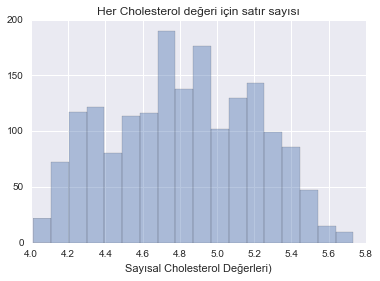

In [25]:
seaborn.distplot(data_98['Cholesterol'].dropna(), kde= False)
plt.xlabel('Sayısal Cholesterol Değerleri)')
plt.title('Her Cholesterol değeri için satır sayısı')

In [26]:
data_98['CholesterolGroup']= pd.cut(data_98.Cholesterol, [4,4.35,4.7,5.05,5.4,5.75]) 
print(len(data_98['CholesterolGroup']))

1779


### Cholesterol grupları için frekans dağılımları:

In [27]:
data_98['CholesterolGroup']= data_98['CholesterolGroup'].astype('category')
data_98['CholesterolGroup'].describe()

count            1779
unique              5
top       (4.7, 5.05]
freq              570
Name: CholesterolGroup, dtype: object

In [28]:
CholesterolGroupP= data_98['CholesterolGroup'].value_counts(sort= False, normalize= True) 
print(CholesterolGroupP)

(4, 4.35]      0.151209
(4.35, 4.7]    0.222597
(4.7, 5.05]    0.320405
(5.05, 5.4]    0.241709
(5.4, 5.75]    0.064081
dtype: float64


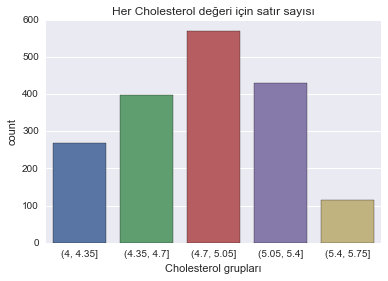

In [29]:
seaborn.countplot(x= 'CholesterolGroup', data= data_98)
plt.xlabel('Cholesterol grupları')
plt.title('Her Cholesterol değeri için satır sayısı')
plt.show()

### Agriculture verilerinin gruplanması:

In [30]:
print ('Agriculture aralığı: '+ str(data_98['Agriculture'].min())+' - '+ str(data_98['Agriculture'].max()) )
data['Agriculture'].describe()

Agriculture aralığı: 0.0 - 62.38272748


count    4273.000000
mean       17.302608
std        14.760059
min         0.000000
25%         4.846209
50%        13.104145
75%        26.311622
max        72.029258
Name: Agriculture, dtype: float64

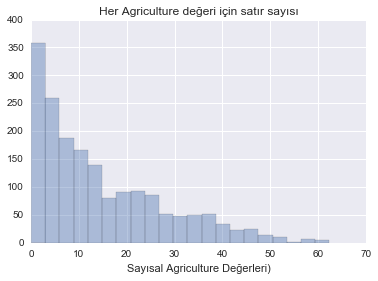

In [31]:
seaborn.distplot(data_98['Agriculture'].dropna(), kde= False)
plt.xlabel('Sayısal Agriculture Değerleri)')
plt.title('Her Agriculture değeri için satır sayısı')

In [32]:
data_98['AgricultureGroup']= pd.cut(data_98.Agriculture, [0,10,20,30,40,50,63]) 
print(len(data_98['AgricultureGroup']))

1779


### Agriculture grupları için frekans dağılımları:

In [33]:
data_98['AgricultureGroup']= data_98['AgricultureGroup'].astype('category')
data_98['AgricultureGroup'].describe()

count        1768
unique          6
top       (0, 10]
freq          853
Name: AgricultureGroup, dtype: object

In [34]:
AgricultureGroupP= data_98['AgricultureGroup'].value_counts(sort= False, normalize= True) 
print(AgricultureGroupP)

(0, 10]     0.479483
(10, 20]    0.218662
(20, 30]    0.147274
(30, 40]    0.092187
(40, 50]    0.041596
(50, 63]    0.014615
dtype: float64


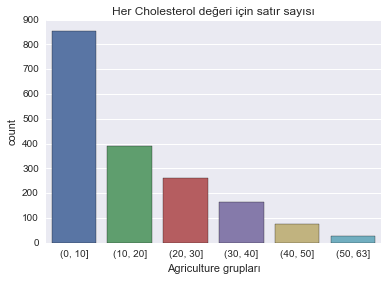

In [35]:
seaborn.countplot(x= 'AgricultureGroup', data= data_98)
plt.xlabel('Agriculture grupları')
plt.title('Her Cholesterol değeri için satır sayısı')
plt.show()

### Cholesterol(in blood) verilerinin yeniden adlandırma:

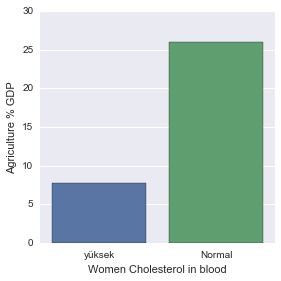

In [36]:
data2=data_98
def CholesterolGroups(row):
   if row['Cholesterol'] > 0 and row['Cholesterol']<= 4.7 :
      return 'Normal'
   if row['Cholesterol'] > 4.7:
      return 'yüksek'


    
data2['CholesterolBirim'] = data2.apply(lambda row: CholesterolGroups (row),axis=1)

seaborn.factorplot(x= 'CholesterolBirim', y= 'Agriculture', data= data2, kind= "bar", ci=None)
plt.xlabel('Women Cholesterol in blood')
plt.ylabel('Agriculture % GDP')
plt.show()

### Agriculture ve Cholesterol verileri arasındaki ilişki grafiği:

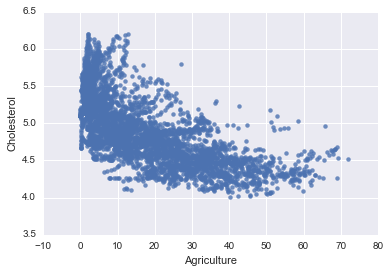

In [37]:
seaborn.regplot(x="Agriculture", y="Cholesterol", fit_reg= False, data=data)

### Agriculture ve Cholesterol verileri arasındaki ilişki grafiği(1998 ve sonrası):

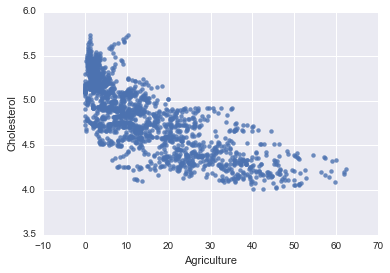

In [38]:
seaborn.regplot(x="Agriculture", y="Cholesterol", fit_reg= False, data=data_98)

### Gruplanmış Agriculture ve Cholesterol verileri arasındaki ilişki grafiği:

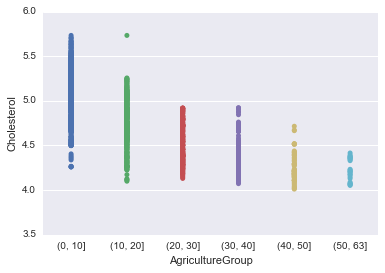

In [39]:
seaborn.stripplot(x="AgricultureGroup", y="Cholesterol", data=data_98)

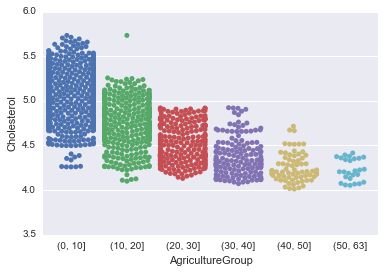

In [40]:
seaborn.swarmplot(x="AgricultureGroup", y="Cholesterol", data=data_98)

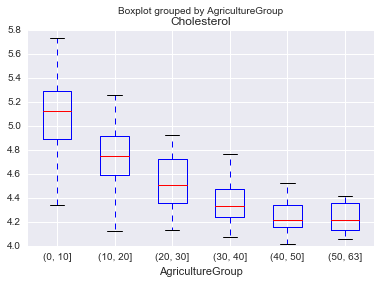

In [41]:
data_98.boxplot(column='Cholesterol', by = 'AgricultureGroup')

### Gruplanmış Cholesterol ve Agriculture verileri arasındaki ilişki grafiği:

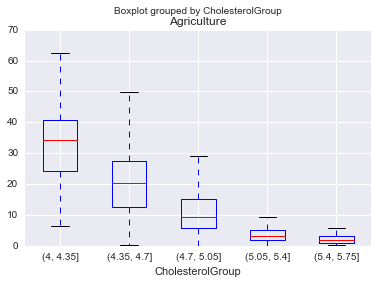

In [42]:
data_98.boxplot(column='Agriculture', by = 'CholesterolGroup')

### Kabarcık grafiğinde nüfus bilgileri de dikkate alarak grafik üretilecek:

İlk aşamada yerleşim yerlerinin nüfus bilgilerinin bulunduğu csv dosyasını okunup, Agriculture ve Cholesterol veri setiyle birleştirilecektir.

In [43]:
data_Population= pd.read_csv('population.csv')
data_98withPopulation= pd.merge(left=data_98, right=data_Population )
data_98withPopulation['Population']= pd.to_numeric(data_98withPopulation['Population'])
data_98withPopulation.dtypes


Area                 object
Year                  int64
Cholesterol         float64
Agriculture         float64
CholesterolGroup     object
AgricultureGroup     object
CholesterolBirim     object
Population            int64
dtype: object

In [44]:
data_98withPopulation_nomissing=data_98withPopulation.dropna(how='any')
data_98withPopulation_nomissing.head(7)

,Area,Year,Cholesterol,Agriculture,CholesterolGroup,AgricultureGroup,CholesterolBirim,Population
0,Albania,1998,4.919365,32.602719,"(4.7, 5.05]","(30, 40]",yüksek,3079037
1,Algeria,1998,4.883001,12.533281,"(4.7, 5.05]","(10, 20]",yüksek,29673694
2,Angola,1998,4.518808,13.033758,"(4.35, 4.7]","(10, 20]",Normal,13138265
3,Antigua and Barbuda,1998,4.966626,3.966907,"(4.7, 5.05]","(0, 10]",yüksek,74190
4,Argentina,1998,5.200735,5.617612,"(5.05, 5.4]","(0, 10]",yüksek,36134642
5,Armenia,1998,4.844500,33.995728,"(4.7, 5.05]","(30, 40]",yüksek,3109101
6,Australia,1998,5.416486,3.436779,"(5.4, 5.75]","(0, 10]",yüksek,18734878


In [45]:
data_98withPopulation_nomissing.index= range(len(data_98withPopulation_nomissing))
data_98withPopulation_nomissing.index
data_2008=data_98withPopulation_nomissing[data_98withPopulation_nomissing['Year']==2008]


### 2008 yılına ait nüfus değerleri ile birlikte kabarcık grafiği:

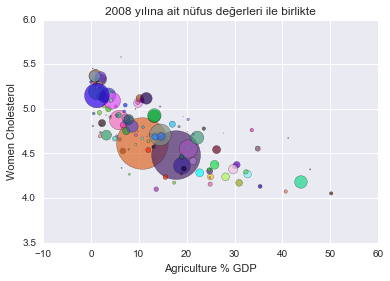

In [46]:
x = data_2008['Agriculture']
y =  data_2008['Cholesterol']
alan = (data_2008['Population'])/500000
renk=[]
for i in data_2008['Agriculture']:
    renk.append(numpy.random.rand(3))
plt.scatter(x, y, s=alan, c=renk, alpha=0.7)
plt.xlabel('Agriculture % GDP')
plt.ylabel('Women Cholesterol')
plt.title('2008 yılına ait nüfus değerleri ile birlikte')
plt.show()

In [47]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import scipy.stats
import numpy as np

### Kadınların kanlarındaki kolesterol miktarı Normal ve Yüksek olmak üzere iki gruba ayrılmıştır.

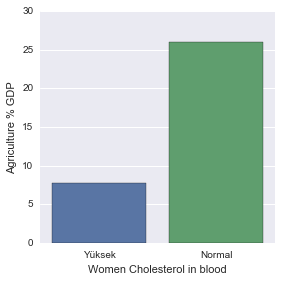

In [48]:
data2=data_98
def CholesterolGroups(row):
   if row['Cholesterol'] > 0 and row['Cholesterol']<= 4.7 :
      return "Normal"
   if row['Cholesterol'] > 4.7:
      return "Yüksek"
    
data2['CholesterolBirim'] = data2.apply(lambda row: CholesterolGroups (row),axis=1)
seaborn.factorplot(x= 'CholesterolBirim', y= 'Agriculture', data= data2, kind= "bar", ci=None)
plt.xlabel('Women Cholesterol in blood')
plt.ylabel('Agriculture % GDP')
plt.show()

### Yerleşim yerlerindeki zirai üretimin ülke ekonomisindeki yüzdelik payları gruplandırıldı.

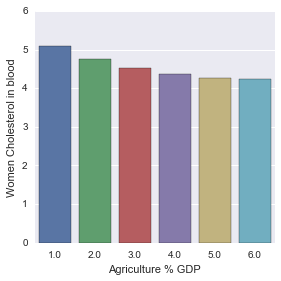

In [49]:
def AgricultureGroups(row):
   if row['Agriculture'] > 0 and row['Agriculture']<= 10 :
      return 1
   if row['Agriculture'] > 10 and row['Agriculture']<= 20 :
      return 2
   if row['Agriculture'] > 20 and row['Agriculture']<= 30 :
      return 3
   if row['Agriculture'] > 30 and row['Agriculture']<= 40 :
      return 4
   if row['Agriculture'] > 40 and row['Agriculture']<= 50 :
      return 5
   if row['Agriculture'] > 50 and row['Agriculture']<= 63 :
      return 6 
    
data2['AgricultureBirim'] = data2.apply(lambda row: AgricultureGroups (row),axis=1)

seaborn.factorplot(x= 'AgricultureBirim', y= 'Cholesterol', data= data2, kind= "bar", ci=None)
plt.ylabel('Women Cholesterol in blood')
plt.xlabel('Agriculture % GDP')
plt.show()

# CHI SQUARE TEST OF INDEPENDENCE (Ki Kare testi)
(for CATEGORICAL TO CATEGORICAL VARIABLES)

AgricultureBirim ve CholesterolBirim kategorilendirilmiş verileri kullanılmıştır.

#### CholesterolBirim: 
Normal ve Yüksek değerlerini içermektedir.

#### AgricultureBirim: 
Tarımsal üretimin milli gelirdeki yüzdelik payı 6 gruba ayrılmıştır. 1,2,3,4,5,6 değerlerini içermektedir.

### data2 içinde bulunan kategorileştirilmiş AgricultureBirim ve CholesterolBirim değerleri data3 içersine aktarılmıştır. Ki kare testi data3 üzerinde gerçekleştirilecektir.

In [50]:
data3= data2[['AgricultureBirim', 'CholesterolBirim']]
print(data3[:10])

      AgricultureBirim CholesterolBirim
2494                 4           Yüksek
2495                 2           Yüksek
2496                 2           Normal
2497                 1           Yüksek
2498                 1           Yüksek
2499                 4           Yüksek
2500                 1           Yüksek
2501                 1           Yüksek
2502                 2           Yüksek
2503                 1           Yüksek


### data3 verilerinin indexleri düzenlendi

In [51]:
data3.index= range(len(data3))
data3.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778],
           dtype='int64', length=1779)

In [52]:
print(data3[:20])

    AgricultureBirim CholesterolBirim
0                  4           Yüksek
1                  2           Yüksek
2                  2           Normal
3                  1           Yüksek
4                  1           Yüksek
5                  4           Yüksek
6                  1           Yüksek
7                  1           Yüksek
8                  2           Yüksek
9                  1           Yüksek
10                 3           Normal
11                 1           Yüksek
12                 2           Yüksek
13                 1           Yüksek
14                 2           Yüksek
15                 4           Normal
16                 1           Yüksek
17                 4           Normal
18                 2           Yüksek
19                 2           Yüksek


### Gözlenen değerlerin olasılık tablosu

In [53]:
ct1=pd.crosstab(data3['CholesterolBirim'], data3['AgricultureBirim'])
print (ct1)

AgricultureBirim    1    2    3    4   5   6
CholesterolBirim                            
Normal             71  159  185  151  73  26
Yüksek            782  230   77   13   1   0


### Gözlenen değerlerin yüzdelik tablosu

In [54]:
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

AgricultureBirim         1        2         3         4         5  6
CholesterolBirim                                                    
Normal            0.083236  0.40874  0.706107  0.920732  0.986486  1
Yüksek            0.916764  0.59126  0.293893  0.079268  0.013514  0


### Agriculture grupları arasında farklılık olup olmadığını bulmak için chi-square(ki kare) testi uygulanacaktır:

Hipotezler:

Ho: Agriculture grupları arasında kayda değer bir farklılık yoktur.

Ha: Agriculture gruplarından en az bir grup diğerlerinden farklıdır.

Yanılma düzeyi:0,05 olarak alınmıştır.

In [55]:
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(803.07145449378572, 2.5050755190759166e-171, 5, array([[ 320.83993213,  146.31504525,   98.54638009,   61.68552036,
          27.83371041,    9.77941176],
       [ 532.16006787,  242.68495475,  163.45361991,  102.31447964,
          46.16628959,   16.22058824]]))


### Yorum: Ki kare testi sonucu bulunan p değeri eşik değerimizden daha küçük olduğu için(p<0.05) Ho hipotezi reddedildi. %5 hata olasılığı ile en az bir grubun diğerlerinden farklı olduğu için Kolesterol değerleri açısından Zirai üretim oran grupları arasında farklılık vardır. 

Tüm gruplar üzerinde gerçekleştirilen ki kare testi ile en az bir grubun diğerlerinden farklı olduğu tespit edildi. Hangi gruplar arasında farklılık olduğunu veya olmadığını tespit etmek için ki kare testi tüm grupların 2'li kombinasyonlarına uygulanacaktır.

Tüm gruplara aynı anda uygulandığında Yanılma düzeyimiz 0.05'dir. 6 grup olduğundan dolayı her ikili kombinasyondan gelen p değeri için 0.05/15=0.0033 değerine göre karşılaştırma yapılacaktır. Buradaki amaç tüm yanılma payımızın 0.05 değerinin üstüne çıkmamasıdır.

Her ikili kombinasyondan gelen p değeri 0.0033 değerinden küçük(p< 0.0033) ise bu iki grup arasında fark olduğu kabul edilecektir. Eğer p değerimiz 0.0033(p> 0.0033) değerinden daha yüksek ise bu iki grup arasında fark olmadığı kabul edilecektir.

### Agriculture 1. ve 2. grupların karşılaştırılması:

In [56]:
recode_1v2 = {1: 1, 2: 2}
data3['Agriculture_1v2']= data3['AgricultureBirim'].map(recode_1v2)

# Gözlenen sayımların olasılık tablosu
table_1v2=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_1v2'])
print (table_1v2)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_1v2.sum(axis=0)
colpct=table_1v2/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v2= scipy.stats.chi2_contingency(table_1v2)
print (cs_1v2)

Agriculture_1v2     1    2
CholesterolBirim          
Normal             71  159
Yüksek            782  230
Agriculture_1v2          1        2
CholesterolBirim                   
Normal            0.083236  0.40874
Yüksek            0.916764  0.59126
chi-square value, p value, expected counts
(185.44624105510511, 3.1360308573636845e-42, 1, array([[ 157.96296296,   72.03703704],
       [ 695.03703704,  316.96296296]]))


#### Yorum: 1. ve 2. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 1. ve 3. grupların karşılaştırılması:

In [57]:
recode_1v3 = {1: 1, 3: 3} 
data3['Agriculture_1v3']= data3['AgricultureBirim'].map(recode_1v3)

# Gözlenen sayımların olasılık tablosu
table_1v3=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_1v3'])
print (table_1v3)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_1v3.sum(axis=0)
colpct=table_1v3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v3= scipy.stats.chi2_contingency(table_1v3)
print (cs_1v3)

Agriculture_1v3     1    3
CholesterolBirim          
Normal             71  185
Yüksek            782   77
Agriculture_1v3          1         3
CholesterolBirim                    
Normal            0.083236  0.706107
Yüksek            0.916764  0.293893
chi-square value, p value, expected counts
(436.11695620958153, 7.57800043656636e-97, 1, array([[ 195.84573991,   60.15426009],
       [ 657.15426009,  201.84573991]]))


#### Yorum: 1. ve 3. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 1. ve 4. grupların karşılaştırılması:

In [58]:
recode_1v4 = {1: 1, 4: 4} 
data3['Agriculture_1v4']= data3['AgricultureBirim'].map(recode_1v4)

# Gözlenen sayımların olasılık tablosu
table_1v4=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_1v4'])
print (table_1v4)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_1v4.sum(axis=0)
colpct=table_1v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v4= scipy.stats.chi2_contingency(table_1v4)
print (cs_1v4)

Agriculture_1v4     1    4
CholesterolBirim          
Normal             71  151
Yüksek            782   13
Agriculture_1v4          1         4
CholesterolBirim                    
Normal            0.083236  0.920732
Yüksek            0.916764  0.079268
chi-square value, p value, expected counts
(560.50717961820499, 6.5206439313358383e-124, 1, array([[ 186.20058997,   35.79941003],
       [ 666.79941003,  128.20058997]]))


#### Yorum: 1. ve 4. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 1. ve 5. grupların karşılaştırılması:

In [59]:
recode_1v5 = {1: 1, 5: 5} 
data3['Agriculture_1v5']= data3['AgricultureBirim'].map(recode_1v5)

# Gözlenen sayımların olasılık tablosu
table_1v5=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_1v5'])
print (table_1v5)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_1v5.sum(axis=0)
colpct=table_1v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v5= scipy.stats.chi2_contingency(table_1v5)
print (cs_1v5)

Agriculture_1v5     1   5
CholesterolBirim         
Normal             71  73
Yüksek            782   1
Agriculture_1v5          1         5
CholesterolBirim                    
Normal            0.083236  0.986486
Yüksek            0.916764  0.013514
chi-square value, p value, expected counts
(416.54601766154263, 1.37801415740873e-92, 1, array([[ 132.50485437,   11.49514563],
       [ 720.49514563,   62.50485437]]))


#### Yorum: 1. ve 5. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 1. ve 6. grupların karşılaştırılması:

In [60]:
recode_1v6 = {1: 1, 6: 6} 
data3['Agriculture_1v6']= data3['AgricultureBirim'].map(recode_1v6)

# Gözlenen sayımların olasılık tablosu
table_1v6=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_1v6'])
print (table_1v6)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_1v6.sum(axis=0)
colpct=table_1v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v6= scipy.stats.chi2_contingency(table_1v6)
print (cs_1v6)

Agriculture_1v6     1   6
CholesterolBirim         
Normal             71  26
Yüksek            782   0
Agriculture_1v6          1  6
CholesterolBirim             
Normal            0.083236  1
Yüksek            0.916764  0
chi-square value, p value, expected counts
(206.76010406209917, 6.9943102212131851e-47, 1, array([[  94.13083049,    2.86916951],
       [ 758.86916951,   23.13083049]]))


####  Yorum: 1. ve 6. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 2. ve 3. grupların karşılaştırılması:

In [61]:
recode_2v3 = {2: 2, 3: 3} 
data3['Agriculture_2v3']= data3['AgricultureBirim'].map(recode_2v3)

# Gözlenen sayımların olasılık tablosu
table_2v3=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_2v3'])
print (table_2v3)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_2v3.sum(axis=0)
colpct=table_2v3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v3= scipy.stats.chi2_contingency(table_2v3)
print (cs_2v3)

Agriculture_2v3     2    3
CholesterolBirim          
Normal            159  185
Yüksek            230   77
Agriculture_2v3         2         3
CholesterolBirim                   
Normal            0.40874  0.706107
Yüksek            0.59126  0.293893
chi-square value, p value, expected counts
(54.367578752929731, 1.6628381558390346e-13, 1, array([[ 205.55453149,  138.44546851],
       [ 183.44546851,  123.55453149]]))


#### Yorum: 2. ve 3. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 2. ve 4. grupların karşılaştırılması:

In [62]:
recode_2v4 = {2: 2, 4: 4} 
data3['Agriculture_2v4']= data3['AgricultureBirim'].map(recode_2v4)

# Gözlenen sayımların olasılık tablosu
table_2v4=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_2v4'])
print (table_2v4)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_2v4.sum(axis=0)
colpct=table_2v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v4= scipy.stats.chi2_contingency(table_2v4)
print (cs_2v4)

Agriculture_2v4     2    4
CholesterolBirim          
Normal            159  151
Yüksek            230   13
Agriculture_2v4         2         4
CholesterolBirim                   
Normal            0.40874  0.920732
Yüksek            0.59126  0.079268
chi-square value, p value, expected counts
(120.69568598445852, 4.4548427073881972e-28, 1, array([[ 218.06509946,   91.93490054],
       [ 170.93490054,   72.06509946]]))


#### Yorum: 2. ve 4. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 2. ve 5. grupların karşılaştırılması:

In [63]:
recode_2v5 = {2: 2, 5: 5}
data3['Agriculture_2v5']= data3['AgricultureBirim'].map(recode_2v5)

# Gözlenen sayımların olasılık tablosu
table_2v5=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_2v5'])
print (table_2v5)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_2v5.sum(axis=0)
colpct=table_2v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v5= scipy.stats.chi2_contingency(table_2v5)
print (cs_2v5)

Agriculture_2v5     2   5
CholesterolBirim         
Normal            159  73
Yüksek            230   1
Agriculture_2v5         2         5
CholesterolBirim                   
Normal            0.40874  0.986486
Yüksek            0.59126  0.013514
chi-square value, p value, expected counts
(80.716239352124632, 2.6057196761427627e-19, 1, array([[ 194.92008639,   37.07991361],
       [ 194.07991361,   36.92008639]]))


#### Yorum: 2. ve 5. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 2. ve 6. grupların karşılaştırılması:

In [64]:
recode_2v6 = {2: 2, 6: 6} 
data3['Agriculture_2v6']= data3['AgricultureBirim'].map(recode_2v6)

# Gözlenen sayımların olasılık tablosu
table_2v6=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_2v6'])
print (table_2v6)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_2v6.sum(axis=0)
colpct=table_2v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v6= scipy.stats.chi2_contingency(table_2v6)
print (cs_2v6)

Agriculture_2v6     2   6
CholesterolBirim         
Normal            159  26
Yüksek            230   0
Agriculture_2v6         2  6
CholesterolBirim            
Normal            0.40874  1
Yüksek            0.59126  0
chi-square value, p value, expected counts
(32.133162194809955, 1.439589395771293e-08, 1, array([[ 173.40963855,   11.59036145],
       [ 215.59036145,   14.40963855]]))


#### Yorum: 2. ve 6. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 3. ve 4. grupların karşılaştırılması:

In [65]:
recode_3v4 = {3: 3, 4: 4} 
data3['Agriculture_3v4']= data3['AgricultureBirim'].map(recode_3v4)

# Gözlenen sayımların olasılık tablosu
table_3v4=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_3v4'])
print (table_3v4)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_3v4.sum(axis=0)
colpct=table_3v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v4= scipy.stats.chi2_contingency(table_3v4)
print (cs_3v4)

Agriculture_3v4     3    4
CholesterolBirim          
Normal            185  151
Yüksek             77   13
Agriculture_3v4          3         4
CholesterolBirim                    
Normal            0.706107  0.920732
Yüksek            0.293893  0.079268
chi-square value, p value, expected counts
(26.609446855799661, 2.490231456546703e-07, 1, array([[ 206.64788732,  129.35211268],
       [  55.35211268,   34.64788732]]))


#### Yorum: 3. ve 4. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 3. ve 5. grupların karşılaştırılması:

In [66]:
recode_3v5 = {3: 3, 5: 5} 
data3['Agriculture_3v5']= data3['AgricultureBirim'].map(recode_3v5)

# Gözlenen sayımların olasılık tablosu
table_3v5=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_3v5'])
print (table_3v5)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_3v5.sum(axis=0)
colpct=table_3v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v5= scipy.stats.chi2_contingency(table_3v5)
print (cs_3v5)

Agriculture_3v5     3   5
CholesterolBirim         
Normal            185  73
Yüksek             77   1
Agriculture_3v5          3         5
CholesterolBirim                    
Normal            0.706107  0.986486
Yüksek            0.293893  0.013514
chi-square value, p value, expected counts
(23.899206967554207, 1.0151357073753299e-06, 1, array([[ 201.17857143,   56.82142857],
       [  60.82142857,   17.17857143]]))


#### Yorum: 3. ve 5. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 3. ve 6. grupların karşılaştırılması:

In [67]:
recode_3v6 = {3: 3, 6: 6} 
data3['Agriculture_3v6']= data3['AgricultureBirim'].map(recode_3v6)

# Gözlenen sayımların olasılık tablosu
table_3v6=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_3v6'])
print (table_3v6)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_3v6.sum(axis=0)
colpct=table_3v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v6= scipy.stats.chi2_contingency(table_3v6)
print (cs_3v6)

Agriculture_3v6     3   6
CholesterolBirim         
Normal            185  26
Yüksek             77   0
Agriculture_3v6          3  6
CholesterolBirim             
Normal            0.706107  1
Yüksek            0.293893  0
chi-square value, p value, expected counts
(8.9833038059223789, 0.0027245758174224803, 1, array([[ 191.95138889,   19.04861111],
       [  70.04861111,    6.95138889]]))


#### Yorum: 3. ve 6. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha küçük olduğundan dolayı bu iki grup arasında farklılık vardır.

### Agriculture 4. ve 5. grupların karşılaştırılması:

In [68]:
recode_4v5 = {4: 4, 5: 5} 
data3['Agriculture_4v5']= data3['AgricultureBirim'].map(recode_4v5)

# Gözlenen sayımların olasılık tablosu
table_4v5=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_4v5'])
print (table_4v5)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_4v5.sum(axis=0)
colpct=table_4v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_4v5= scipy.stats.chi2_contingency(table_4v5)
print (cs_4v5)

Agriculture_4v5     4   5
CholesterolBirim         
Normal            151  73
Yüksek             13   1
Agriculture_4v5          4         5
CholesterolBirim                    
Normal            0.920732  0.986486
Yüksek            0.079268  0.013514
chi-square value, p value, expected counts
(2.8831343729400136, 0.089511631565738117, 1, array([[ 154.35294118,   69.64705882],
       [   9.64705882,    4.35294118]]))


#### Yorum: 4. ve 5. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha büyük olduğundan dolayı bu iki grup arasında farklılık yoktur.

### Agriculture 4. ve 6. grupların karşılaştırılması:

In [69]:
recode_4v6 = {4: 4, 6: 6} 
data3['Agriculture_4v6']= data3['AgricultureBirim'].map(recode_4v6)

# Gözlenen sayımların olasılık tablosu
table_4v6=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_4v6'])
print (table_4v6)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_4v6.sum(axis=0)
colpct=table_4v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_4v6= scipy.stats.chi2_contingency(table_4v6)
print (cs_4v6)

Agriculture_4v6     4   6
CholesterolBirim         
Normal            151  26
Yüksek             13   0
Agriculture_4v6          4  6
CholesterolBirim             
Normal            0.920732  1
Yüksek            0.079268  0
chi-square value, p value, expected counts
(1.1434899012012887, 0.28491609980522337, 1, array([[ 152.77894737,   24.22105263],
       [  11.22105263,    1.77894737]]))


#### Yorum: 4. ve 6. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha büyük olduğundan dolayı bu iki grup arasında farklılık yoktur.

### Agriculture 5. ve 6. grupların karşılaştırılması:


In [70]:
recode_5v6 = {5: 5, 6: 6} 
data3['Agriculture_5v6']= data3['AgricultureBirim'].map(recode_5v6)

# Gözlenen sayımların olasılık tablosu
table_5v6=pd.crosstab(data3['CholesterolBirim'], data3['Agriculture_5v6'])
print (table_5v6)

# Gözlenen sayımların yüzdelik tablosu
colsum=table_5v6.sum(axis=0)
colpct=table_5v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_5v6= scipy.stats.chi2_contingency(table_5v6)
print (cs_5v6)

Agriculture_5v6    5   6
CholesterolBirim        
Normal            73  26
Yüksek             1   0
Agriculture_5v6          5  6
CholesterolBirim             
Normal            0.986486  1
Yüksek            0.013514  0
chi-square value, p value, expected counts
(0.3024003024003023, 0.58238154512044171, 1, array([[ 73.26,  25.74],
       [  0.74,   0.26]]))


#### Yorum: 5. ve 6. grup karşılaştırması sonucundaki p değeri 0.0033 değerinden daha büyük olduğundan dolayı bu iki grup arasında farklılık yoktur.

### Tüm ikili grup karşılaştırmalarının gerçekleştirilip gerçekleştirilmediği kontrol edildi.

In [71]:
data3.dtypes

AgricultureBirim    float64
CholesterolBirim     object
Agriculture_1v2     float64
Agriculture_1v3     float64
Agriculture_1v4     float64
Agriculture_1v5     float64
Agriculture_1v6     float64
Agriculture_2v3     float64
Agriculture_2v4     float64
Agriculture_2v5     float64
Agriculture_2v6     float64
Agriculture_3v4     float64
Agriculture_3v5     float64
Agriculture_3v6     float64
Agriculture_4v5     float64
Agriculture_4v6     float64
Agriculture_5v6     float64
dtype: object

### Her grup ikilisi için yapılan karşılaştırmalardan elde edilen p değerleri farklı bir data frame aktarıldı.

In [72]:
d = {'1' : pd.Series([cs_1v2[1],cs_1v3[1],cs_1v4[1],cs_1v5[1],cs_1v6[1]], index=['2', '3','4','5','6']),
     '2' : pd.Series([cs_2v3[1], cs_2v4[1],cs_2v5[1],cs_2v6[1]], index=['3','4','5','6']),
     '3' : pd.Series([cs_3v4[1],cs_3v5[1],cs_3v6[1]], index=['4','5','6']),
     '4' : pd.Series([cs_4v5[1],cs_4v6[1]], index=['5','6']),
     '5' : pd.Series([cs_5v6[1]], index=['6']),
     '6' : pd.Series([np.nan,np.nan,np.nan,np.nan,np.nan,np.nan], index=['1', '2', '3','4','5','6'])}

df = pd.DataFrame(d)
df

,1,2,3,4,5,6
1,NaN,NaN,NaN,NaN,NaN,NaN
2,3.136031e-42,NaN,NaN,NaN,NaN,NaN
3,7.578000e-97,1.662838e-13,NaN,NaN,NaN,NaN
4,6.520644e-124,4.454843e-28,2.490231e-07,NaN,NaN,NaN
5,1.378014e-92,2.605720e-19,1.015136e-06,0.089512,NaN,NaN
6,6.994310e-47,1.439589e-08,2.724576e-03,0.284916,0.582382,NaN


# Her bir grup için elde edilen p değerleri tabloya yerleştirildi ve aralarında farklılık göstermeyen gruplar için olan p değerleri sarı arka plan ile işaretlendi

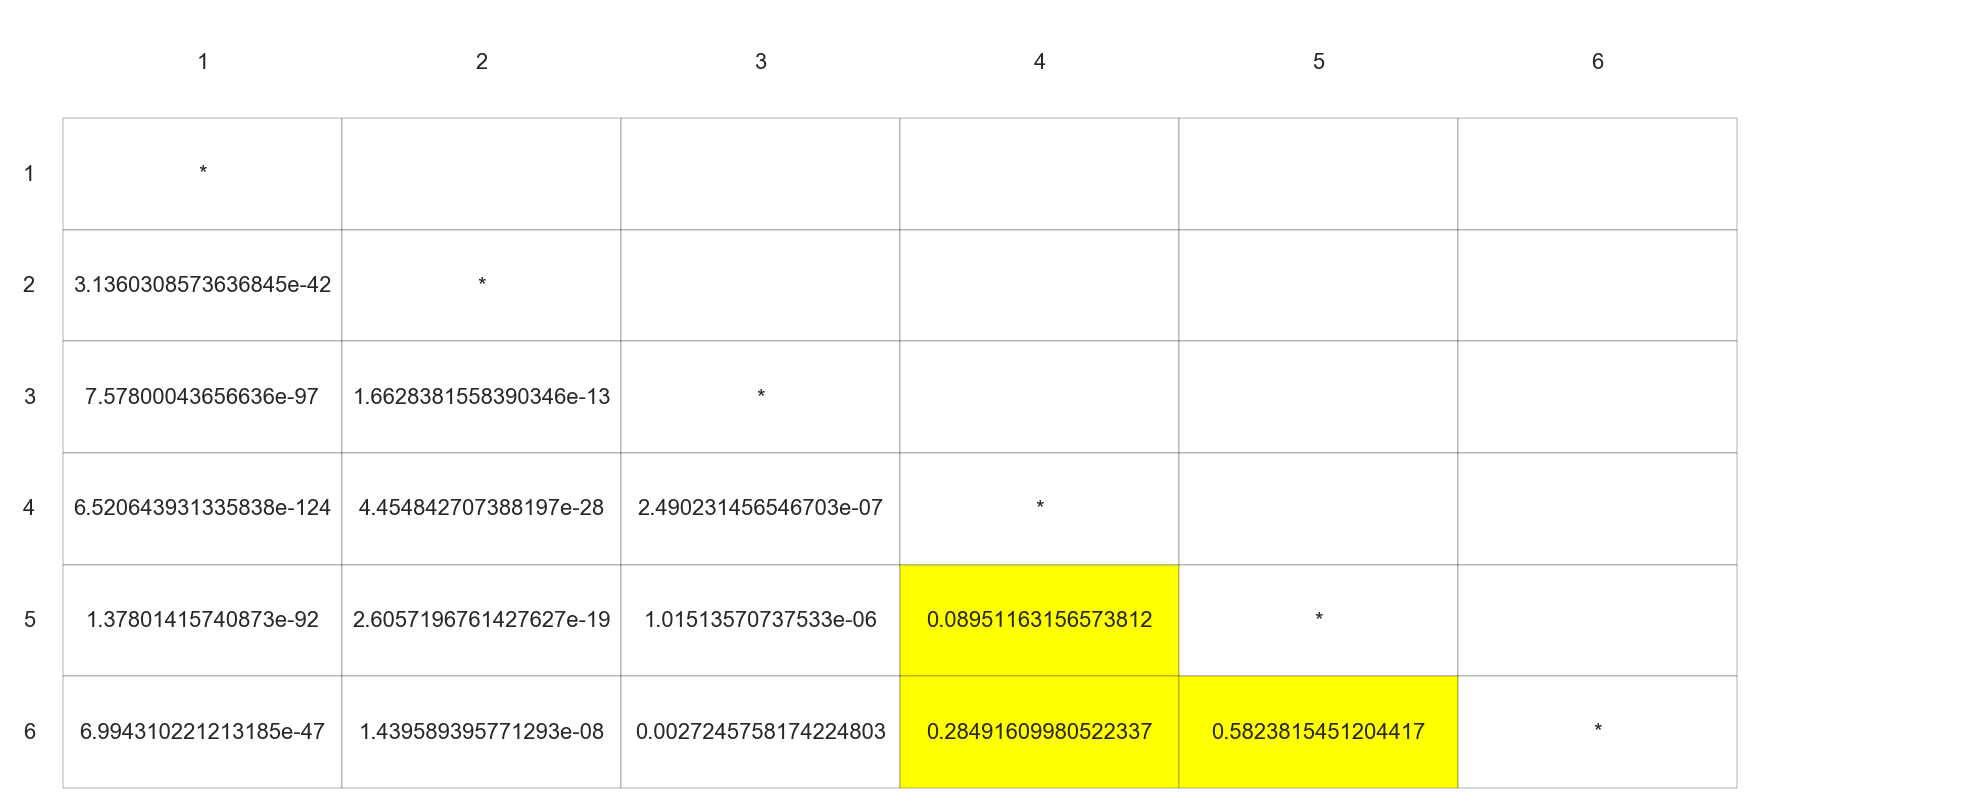

In [73]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import pandas

def main():
    data = pandas.DataFrame(df)
    checkerboard_table(data)
    plt.show()

def checkerboard_table(data, fmt='{:}', bkg_colors=['yellow', 'white']):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,5,3])

    nrows, ncols = data.shape
    width, height = 1.0/nrows , 1.0/ncols

    # Add cells
    for (i,j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = bkg_colors[idx]

        if val>=0.0033 :
            color='yellow'
        else:
            color='white'
                
        if (np.isnan(val)):
            val=""
            
        if (i==j):
            val="*"
        
        tb.add_cell(i, j, width, height, text=fmt.format(val), 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(data.index):
        tb.add_cell(i, -1, width, height, text=label, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(data.columns):
        tb.add_cell(-1, j, width, height, text=label, loc='center', 
                           edgecolor='none', facecolor='none')
    tb.auto_set_font_size(False)
    tb.set_fontsize(22)
    ax.add_table(tb)
    
    return fig

if __name__ == '__main__':
    main()

# Ara değerlendirme:
Kadınların kanındaki kolesterol miktarları: Normal ve Yüksek olmak üzere 2 kategoriye ayrılmıştır.

Zirai üretimin ülke ekonomisindeki yüzdelik payları ise 1 en düşük,6 en yüksek olmak üzere 6 farklı kategoriye ayrılmıştır.(1,2,3,4,5,6)

#### Hipotez:
Zirai üretimin kadınların kolesterol değerleri üzerinde etkisi olup olmadığını bulmak için şu hipotezler oluşturulmuştur. (Yanılma düzeyi:0,05 olarak alınmıştır.)

Ho: Agriculture grupları arasında kayda değer bir farklılık yoktur.

Ha: Agriculture gruplarından en az bir grup diğerlerinden farklıdır.



#### Tüm gruplar üzerinde chi-square (ki kare) testi: 
Ki kare testi uygulandığında bulunan p değeri 0.05 değerinden daha küçük olduğu için %5'lik yanılma payı ile Ho hipotezi reddedildi. En az bir grubun diğerlerinden farklı olduğu kabul edildi.

#### Hangi gruplar arasında farklılık vardır?
Hangi gruplar arasında farklılık olduğunun tespit edilmesi için her iki grup kendi arasında karşılaştırıldı.

6 adet grup olduğundan dolayı her grup için yanılma payı: 0.0033 olarak kabul edilmiştir. Grup karşılaştırmasında p değeri 0.0033 değerinden küçük olduğunda grupların farklı olduğu veya p değeri 0.0033 değerinden büyük ise grupların farklı olmadığı görülmüştür.

Yukarıdaki tabloda birbirinden farklı olmayan gruplar sarı renkle işaretlenmiştir.
4, 5 ve 6 numaralı gruplar kendi aralarında farklılık göstermemektedir. Fakat diğer gruplar arasında önemli farklılıklar bulunmaktadır.

## chimerge yöntemi:
Veri madenciliğinde gruplar arasında fark olup olmadığının tespiti ve daha sonrasında fark olmayan grupların birleştirilme aşamasında kullanılan bir yöntemdir. Temelinde Chi square değerine göre farklılık olmayan grupların birleştirilmesi mantığı vardır.

Bu yönteme göre projemdeki 6 grup içindeki 3 grupta farklılık olmadığını chi square testi ile tespit edildi. Fark olmayan bölümler birleştirilerek bu gruplar içinde tekrardan chi square testi uygulanacaktır. İkinci uygulama data4 üzerinde gerçekleştirilecektir.

### Kolesterol grupları:

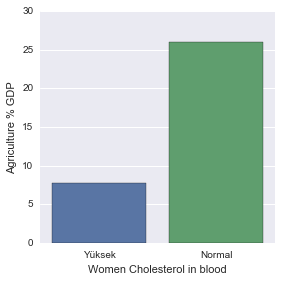

In [74]:
data4=data_98
def CholesterolGroups(row):
   if row['Cholesterol'] > 0 and row['Cholesterol']<= 4.7 :
      return "Normal"
   if row['Cholesterol'] > 4.7:
      return "Yüksek"
    
data4['CholesterolBirim'] = data4.apply(lambda row: CholesterolGroups (row),axis=1)
seaborn.factorplot(x= 'CholesterolBirim', y= 'Agriculture', data= data4, kind= "bar", ci=None)
plt.xlabel('Women Cholesterol in blood')
plt.ylabel('Agriculture % GDP')
plt.show()

### Zirai üretim grupları:
    Bir önceki uygulamada hesaplanan chi square sonuçlarına göre 4,5 ve 6. gruplar birleştirildi.

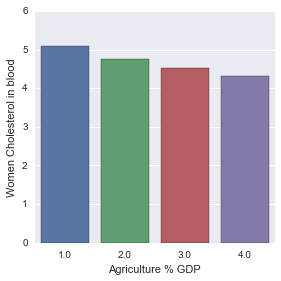

In [75]:
def AgricultureGroups(row):
   if row['Agriculture'] > 0 and row['Agriculture']<= 10 :
      return 1
   if row['Agriculture'] > 10 and row['Agriculture']<= 20 :
      return 2
   if row['Agriculture'] > 20 and row['Agriculture']<= 30 :
      return 3
   if row['Agriculture'] > 30 and row['Agriculture']<= 63 :
      return 4
  
    
data4['AgricultureBirim'] = data4.apply(lambda row: AgricultureGroups (row),axis=1)

seaborn.factorplot(x= 'AgricultureBirim', y= 'Cholesterol', data= data4, kind= "bar", ci=None)
plt.ylabel('Women Cholesterol in blood')
plt.xlabel('Agriculture % GDP')
plt.show()

In [76]:
data4= data4[['AgricultureBirim', 'CholesterolBirim']]
print(data4[:10])

      AgricultureBirim CholesterolBirim
2494                 4           Yüksek
2495                 2           Yüksek
2496                 2           Normal
2497                 1           Yüksek
2498                 1           Yüksek
2499                 4           Yüksek
2500                 1           Yüksek
2501                 1           Yüksek
2502                 2           Yüksek
2503                 1           Yüksek


In [77]:
data4.index= range(len(data4))
data4.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778],
           dtype='int64', length=1779)

### Gözlenen değerlerin olasılık ve yüzdelik tablosu:

In [78]:
ct2=pd.crosstab(data4['CholesterolBirim'], data4['AgricultureBirim'])
print (ct2)
colsum2=ct2.sum(axis=0)
print("--------------------------------------------------------------")
colpct2=ct2/colsum2
print(colpct2)

AgricultureBirim    1    2    3    4
CholesterolBirim                    
Normal             71  159  185  250
Yüksek            782  230   77   14
--------------------------------------------------------------
AgricultureBirim         1        2         3        4
CholesterolBirim                                      
Normal            0.083236  0.40874  0.706107  0.94697
Yüksek            0.916764  0.59126  0.293893  0.05303


### Agriculture grupları arasında farklılık olup olmadığını bulmak için chi-square(ki kare) testi uygulanacaktır

Ho: Agriculture grupları arasında kayda değer bir farklılık yoktur.

Ha: Agriculture gruplarından en az bir grup diğerlerinden farklıdır.

Yanılma düzeyi:0,05 olarak alınmıştır.

In [79]:
print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

chi-square value, p value, expected counts
(801.78626937063098, 1.7735106102514932e-173, 3, array([[ 320.83993213,  146.31504525,   98.54638009,   99.29864253],
       [ 532.16006787,  242.68495475,  163.45361991,  164.70135747]]))


### p değeri 0.05 değerinden daha küçük olduğu için gruplar arasında farklılık olduğu görülmektedir. Hangi gruplar arasında farklılık olduğunu tüm grupların ikili kombinleri için ki kare testi tekrardan uygulanacaktır.

4 grup olduğundan dolayı her grup için yanılma payı=0.05/6=0,0083

In [80]:
recode2_1v2 = {1: 1, 2: 2}
data4['Agriculture_1v2']= data4['AgricultureBirim'].map(recode2_1v2)

# Gözlenen sayımların olasılık tablosu
table2_1v2=pd.crosstab(data4['CholesterolBirim'], data4['Agriculture_1v2'])
print (table2_1v2)

# Gözlenen sayımların yüzdelik tablosu
colsum2=table2_1v2.sum(axis=0)
colpct2=table2_1v2/colsum2
print(colpct2)

print ('chi-square value, p value, expected counts')
cs2_1v2= scipy.stats.chi2_contingency(table2_1v2)
print (cs2_1v2)

Agriculture_1v2     1    2
CholesterolBirim          
Normal             71  159
Yüksek            782  230
Agriculture_1v2          1        2
CholesterolBirim                   
Normal            0.083236  0.40874
Yüksek            0.916764  0.59126
chi-square value, p value, expected counts
(185.44624105510511, 3.1360308573636845e-42, 1, array([[ 157.96296296,   72.03703704],
       [ 695.03703704,  316.96296296]]))


In [81]:
recode2_1v3 = {1: 1, 3: 3} 
data4['Agriculture_1v3']= data4['AgricultureBirim'].map(recode2_1v3)

# Gözlenen sayımların olasılık tablosu
table2_1v3=pd.crosstab(data4['CholesterolBirim'], data4['Agriculture_1v3'])
print (table2_1v3)

# Gözlenen sayımların yüzdelik tablosu
colsum2=table2_1v3.sum(axis=0)
colpct2=table2_1v3/colsum2
print(colpct2)

print ('chi-square value, p value, expected counts')
cs2_1v3= scipy.stats.chi2_contingency(table2_1v3)
print (cs2_1v3)

Agriculture_1v3     1    3
CholesterolBirim          
Normal             71  185
Yüksek            782   77
Agriculture_1v3          1         3
CholesterolBirim                    
Normal            0.083236  0.706107
Yüksek            0.916764  0.293893
chi-square value, p value, expected counts
(436.11695620958153, 7.57800043656636e-97, 1, array([[ 195.84573991,   60.15426009],
       [ 657.15426009,  201.84573991]]))


In [82]:
recode2_1v4 = {1: 1, 4: 4} 
data4['Agriculture_1v4']= data4['AgricultureBirim'].map(recode2_1v4)

# Gözlenen sayımların olasılık tablosu
table2_1v4=pd.crosstab(data4['CholesterolBirim'], data4['Agriculture_1v4'])
print (table2_1v4)

# Gözlenen sayımların yüzdelik tablosu
colsum2=table2_1v4.sum(axis=0)
colpct2=table2_1v4/colsum2
print(colpct2)

print ('chi-square value, p value, expected counts')
cs2_1v4= scipy.stats.chi2_contingency(table2_1v4)
print (cs2_1v4)

Agriculture_1v4     1    4
CholesterolBirim          
Normal             71  250
Yüksek            782   14
Agriculture_1v4          1        4
CholesterolBirim                   
Normal            0.083236  0.94697
Yüksek            0.916764  0.05303
chi-square value, p value, expected counts
(730.21455738688178, 8.0453631562306022e-161, 1, array([[ 245.13249776,   75.86750224],
       [ 607.86750224,  188.13249776]]))


In [83]:
recode2_2v3 = {2: 2, 3: 3} 
data4['Agriculture_2v3']= data4['AgricultureBirim'].map(recode2_2v3)

# Gözlenen sayımların olasılık tablosu
table2_2v3=pd.crosstab(data4['CholesterolBirim'], data4['Agriculture_2v3'])
print (table2_2v3)

# Gözlenen sayımların yüzdelik tablosu
colsum2=table2_2v3.sum(axis=0)
colpct2=table2_2v3/colsum2
print(colpct2)

print ('chi-square value, p value, expected counts')
cs2_2v3= scipy.stats.chi2_contingency(table2_2v3)
print (cs2_2v3)

Agriculture_2v3     2    3
CholesterolBirim          
Normal            159  185
Yüksek            230   77
Agriculture_2v3         2         3
CholesterolBirim                   
Normal            0.40874  0.706107
Yüksek            0.59126  0.293893
chi-square value, p value, expected counts
(54.367578752929731, 1.6628381558390346e-13, 1, array([[ 205.55453149,  138.44546851],
       [ 183.44546851,  123.55453149]]))


In [84]:
recode2_2v4 = {2: 2, 4: 4} 
data4['Agriculture_2v4']= data4['AgricultureBirim'].map(recode2_2v4)

# Gözlenen sayımların olasılık tablosu
table2_2v4=pd.crosstab(data4['CholesterolBirim'], data4['Agriculture_2v4'])
print (table2_2v4)

# Gözlenen sayımların yüzdelik tablosu
colsum2=table2_2v4.sum(axis=0)
colpct2=table2_2v4/colsum2
print(colpct2)

print ('chi-square value, p value, expected counts')
cs2_2v4= scipy.stats.chi2_contingency(table2_2v4)
print (cs2_2v4)

Agriculture_2v4     2    4
CholesterolBirim          
Normal            159  250
Yüksek            230   14
Agriculture_2v4         2        4
CholesterolBirim                  
Normal            0.40874  0.94697
Yüksek            0.59126  0.05303
chi-square value, p value, expected counts
(192.37223651439888, 9.6502709901749646e-44, 1, array([[ 243.64624809,  165.35375191],
       [ 145.35375191,   98.64624809]]))


In [85]:
recode2_3v4 = {3: 3, 4: 4} 
data4['Agriculture_3v4']= data4['AgricultureBirim'].map(recode2_3v4)

# Gözlenen sayımların olasılık tablosu
table2_3v4=pd.crosstab(data4['CholesterolBirim'], data4['Agriculture_3v4'])
print (table2_3v4)

# Gözlenen sayımların yüzdelik tablosu
colsum2=table2_3v4.sum(axis=0)
colpct2=table2_3v4/colsum2
print(colpct2)

print ('chi-square value, p value, expected counts')
cs2_3v4= scipy.stats.chi2_contingency(table2_3v4)
print (cs2_3v4)

Agriculture_3v4     3    4
CholesterolBirim          
Normal            185  250
Yüksek             77   14
Agriculture_3v4          3        4
CholesterolBirim                   
Normal            0.706107  0.94697
Yüksek            0.293893  0.05303
chi-square value, p value, expected counts
(51.650992369187946, 6.6297123067415391e-13, 1, array([[ 216.6730038,  218.3269962],
       [  45.3269962,   45.6730038]]))


In [86]:
d2 = {'1' : pd.Series([cs2_1v2[1],cs2_1v3[1],cs2_1v4[1]], index=['2', '3','4']),
     '2' : pd.Series([cs2_2v3[1], cs2_2v4[1]], index=['3','4']),
     '3' : pd.Series([cs_3v4[1]], index=['4']),
     '6' : pd.Series([np.nan,np.nan,np.nan,np.nan], index=['1', '2', '3','4'])}

df2 = pd.DataFrame(d2)
df2

,1,2,3,6
1,NaN,NaN,NaN,NaN
2,3.136031e-42,NaN,NaN,NaN
3,7.578000e-97,1.662838e-13,NaN,NaN
4,8.045363e-161,9.650271e-44,2.490231e-07,NaN


### chi square testi p değerlerinin görselleştirilmesi:

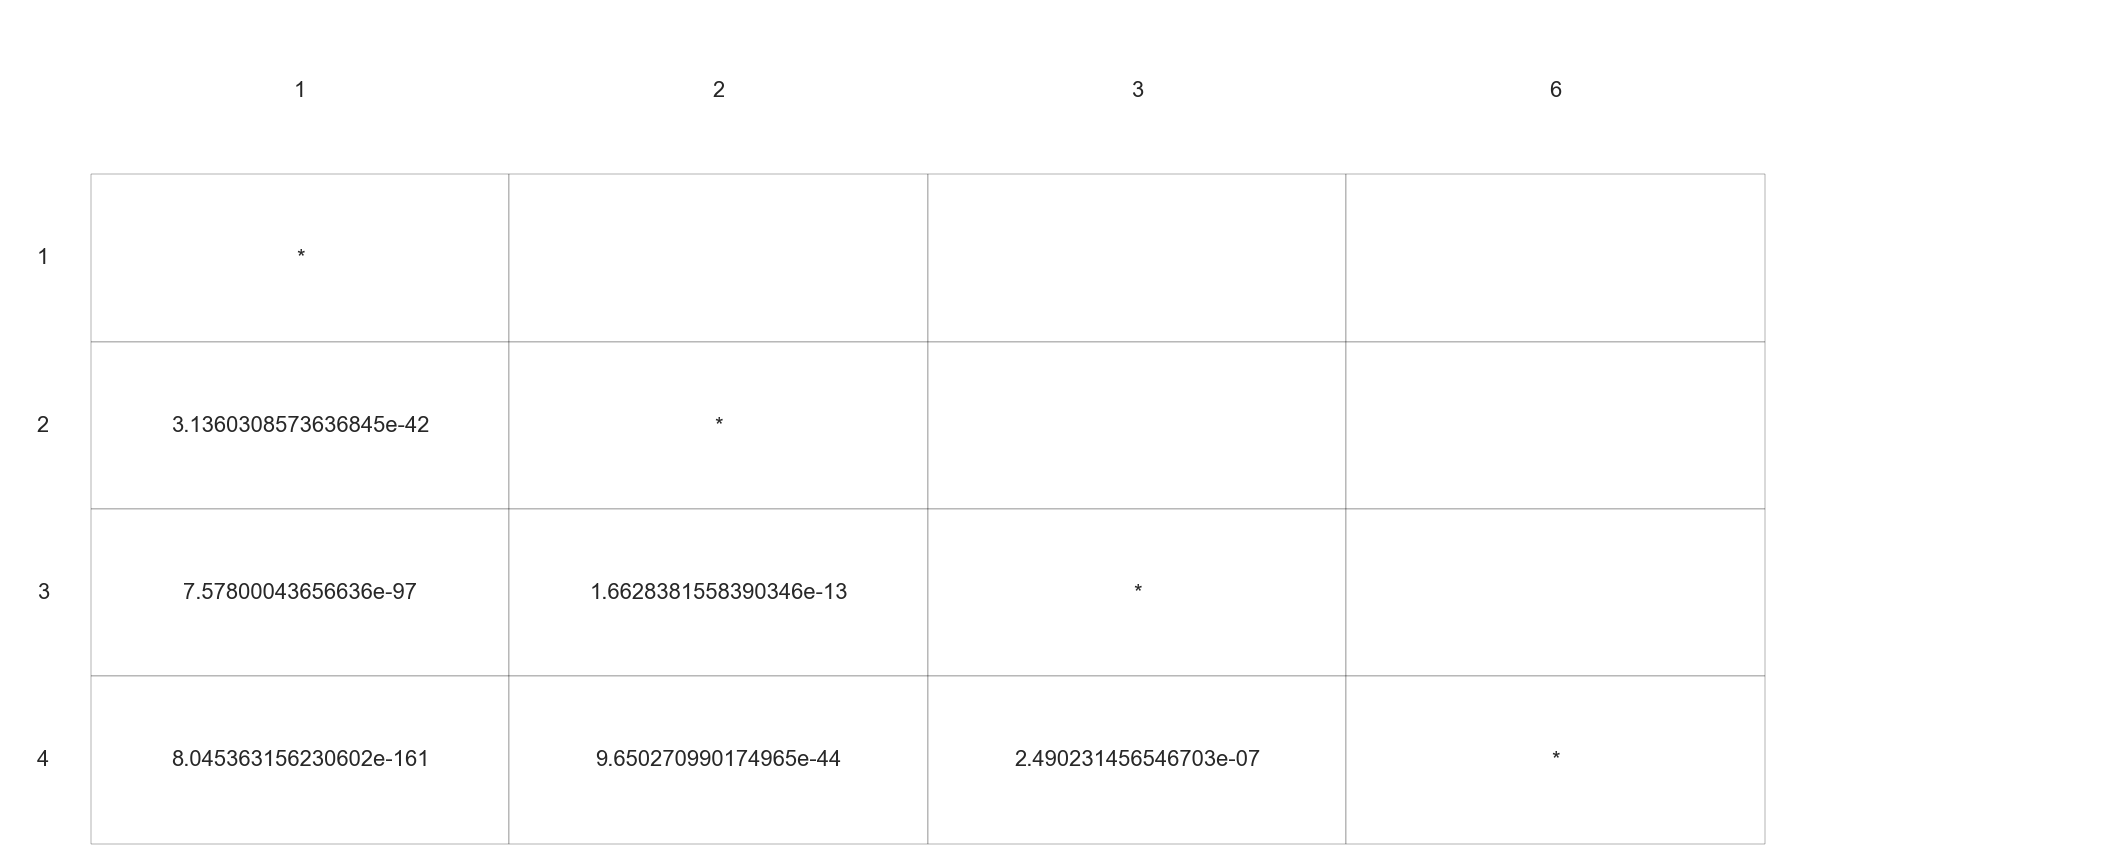

In [87]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import pandas

def main():
    data = pandas.DataFrame(df2)
    checkerboard_table(data)
    plt.show()

def checkerboard_table(data, fmt='{:}', bkg_colors=['yellow', 'white']):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,5,3])

    nrows, ncols = data.shape
    width, height = 1.0/nrows , 1.0/ncols

    # Add cells
    for (i,j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = bkg_colors[idx]

        if val>=0.0083 :
            color='yellow'
        else:
            color='white'
                
        if (np.isnan(val)):
            val=""
            
        if (i==j):
            val="*"
        
        tb.add_cell(i, j, width, height, text=fmt.format(val), 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(data.index):
        tb.add_cell(i, -1, width, height, text=label, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(data.columns):
        tb.add_cell(-1, j, width, height, text=label, loc='center', 
                           edgecolor='none', facecolor='none')
    tb.auto_set_font_size(False)
    tb.set_fontsize(22)
    ax.add_table(tb)
    
    return fig

if __name__ == '__main__':
    main()

# SONUÇ:
Yerleşim yerlerindeki zirai üretimin ülke ekonomisindeki yüzdelik payları ile o yerde yaşayan kadınların kanlarındaki kolesterol miktarı arasında bir ilişki olup olmadığı üzerine bir çalışma yapılmıştır.

### Gruplar:
Kadınların kanındaki kolesterol miktarları: Normal ve Yüksek olmak üzere 2 kategoriye ayrılmıştır.

İlk ki kare testinde:Zirai üretimin ülke ekonomisindeki yüzdelik payları ise 1 en düşük,6 en yüksek olmak üzere 6 farklı kategoriye ayrılmıştır.(1,2,3,4,5,6)

ikinci ki kare testinde: İlk aşamada gruplar arası bulunan p değerlerine göre farklılık olmayan bölümler birleştirildi.
Zirai üretimin ülke ekonomisindeki yüzdelik payları ise 1 en düşük,4 en yüksek olmak üzere 4 farklı kategoriye ayrılmıştır.(1,2,3,4)

### Hipotez:

Zirai üretimin kadınların kolesterol değerleri üzerinde etkisi olup olmadığını bulmak için şu hipotezler oluşturulmuştur. (Yanılma düzeyi:0,05 olarak alınmıştır.)

Ho: Agriculture grupları arasında kayda değer bir farklılık yoktur.

Ha: Agriculture gruplarından en az bir grup diğerlerinden farklıdır.


### Tüm gruplar üzerinde chi-square (ki kare) testi:

Ki kare testi uygulandığında bulunan p değeri 0.05 değerinden daha küçük olduğu için %5'lik yanılma payı ile Ho hipotezi reddedildi. En az bir grubun diğerlerinden farklı olduğu kabul edildi.


### 1.UYGULAMA CHİ SQUARE - Hangi gruplar arasında farklılık vardır?

Hangi gruplar arasında farklılık olduğunun tespit edilmesi için her iki grup kendi arasında karşılaştırıldı. Yukarıdaki tabloda görüldüğü üzere 6 adet grup bulunmaktadır. Hangi gruplar arasında farklılık olup olmadığı tespiti amacıyla her grup ikilisi için ki kare testi uygulanmış ve her ikili grup karşılaştırması için p değeri elde edilmiştir.

6 adet grup olduğundan dolayı her grup için yanılma payı: 0.0033 olarak kabul edilmiştir. Grup karşılaştırmasında p değeri 0.0033 değerinden küçük olduğunda grupların farklı olduğu veya p değeri 0.0033 değerinden büyük ise grupların farklı olmadığı görülmüştür.

Yukarıdaki tabloda birbirinden farklı olmayan gruplar sarı renkle işaretlenmiştir. 4, 5 ve 6 numaralı gruplar kendi aralarında farklılık göstermemektedir. Fakat diğer gruplar arasında önemli farklılıklar bulunmaktadır. 


### 2.UYGULAMA CHİ SQUARE - Hangi gruplar arasında farklılık vardır?

1.uygulamada aralarında farklılık tespit edilmeyen gruplar birleştirildi. Tekrardan hangi gruplar arasında farklılık olduğunun tespit edilmesi için her iki grup kendi arasında karşılaştırıldı.

1 adet grup olduğundan dolayı her grup için yanılma payı: 0.0083 olarak kabul edilmiştir. p değerlerine bakıldığında tüm grupların birbirinden farklı olduğu görülmüştür.

### Sonuç olarak:
Yerleşim yerlerindeki zirai üretimin ülke ekonomisindeki yüzdelik payları ile o yerde yaşayan kadınların kanlarındaki kolesterol miktarına etkisi gruplar arasındaki farklılıklardan görülmektedir.